In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_data = pd.read_csv('uci-secom.csv')

In [4]:
len(raw_data)

1567

In [5]:
raw_data['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

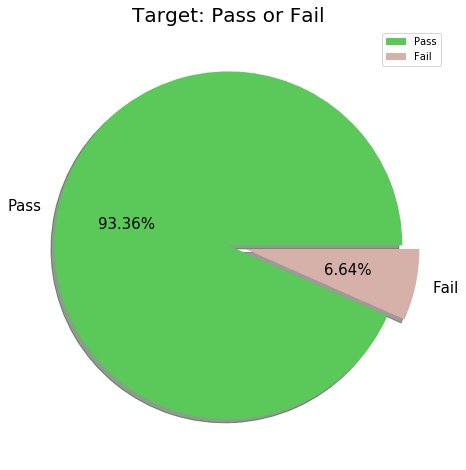

In [39]:
labels = ['Pass', 'Fail']
size = raw_data['Pass/Fail'].value_counts()
colors = ['#5bc959','#d5b1aa' ]
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True, textprops = {'fontsize':15})
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()

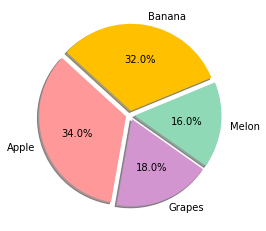

In [6]:


ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

# 1.  null값 처리

In [40]:
null = []

In [41]:
Not_null = []

In [42]:
null = raw_data.isnull().sum()

In [43]:
for i in null.index:
    if null[i] == 0:
        Not_null.append(i)

In [44]:
null = null.drop(Not_null)

Text(0, 0.5, 'Column')

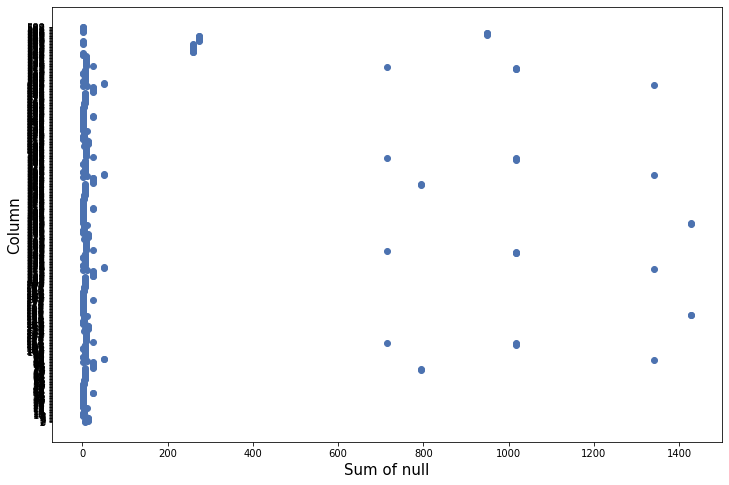

In [48]:
plt.figure(figsize=(12,8))
plt.scatter(null,null.index)
plt.xlabel('Sum of null',fontsize=15)
plt.ylabel('Column',fontsize=15)

In [12]:
null_20 = []

In [13]:
for i in null.index:
    if null[i] < 20:
        null_20.append(i)

In [14]:
null = null.drop(null_20)

## null 값이 20 이상인 컬럼 시각화

In [15]:
null.index

Index(['40', '41', '72', '73', '75', '76', '77', '78', '79', '80',
       ...
       '564', '565', '566', '567', '568', '569', '578', '579', '580', '581'],
      dtype='object', length=103)

Text(0.5, 1.0, 'Sum of null by Column')

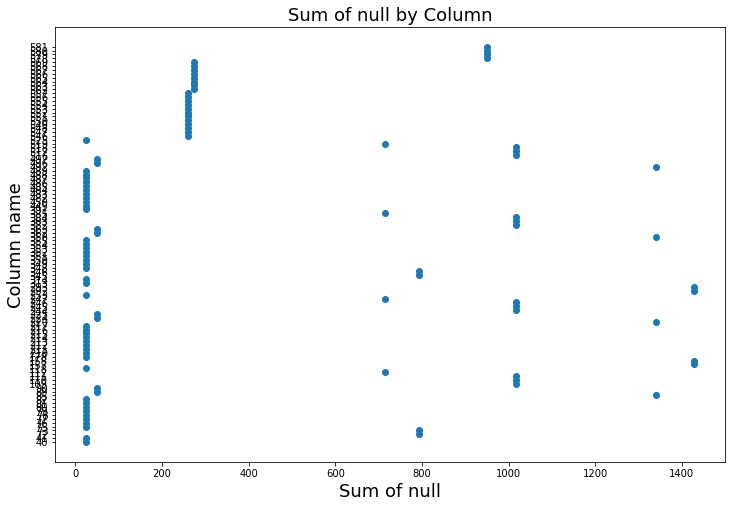

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(null,null.index)
plt.xlabel('Sum of null', fontsize=18)
plt.ylabel('Column name', fontsize=18)
plt.title('Sum of null by Column', fontsize=18)

## null값이 20 개 이상인 컬럼 삭제 
> 결과적으로 103개의 컬럼이 삭제

In [17]:
data = raw_data.copy()

In [18]:
data = data.drop(null.index,axis=1)

In [23]:
data.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '577', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=489)

 삭제된 열의 Pass/Fail 분포 확인

In [45]:
df = raw_data.copy()

In [46]:
data.columns[:-1]

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '576', '577', '582', '583', '584', '585', '586', '587', '588', '589'],
      dtype='object', length=488)

In [47]:
df = df.drop(data.columns[:-1], axis=1)

In [48]:
# 삭제한 열만 포함한 데이터 프레임 
df.columns

Index(['40', '41', '72', '73', '75', '76', '77', '78', '79', '80',
       ...
       '565', '566', '567', '568', '569', '578', '579', '580', '581',
       'Pass/Fail'],
      dtype='object', length=104)

In [50]:
df['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

## null 값 median 으로 변환

In [243]:
data.replace(np.nan, data.median(), inplace=True)

In [244]:
data.isnull().any().any()

False

In [245]:
data.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '577', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=489)

In [223]:
X = data.loc[:,'0':'589']
y = data.loc[:,'Pass/Fail']

In [224]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,576,577,582,583,584,585,586,587,588,589
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,...,1.6679,13.7755,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,3076.33,2456.13,2217.4111,1032.2836,1.4802,100.0,101.3511,0.1195,1.3120,-0.0043,...,1.2878,22.9183,0.4960,0.0157,0.0036,3.1743,0.0150,0.0176,0.0057,117.4564
1560,2770.40,2549.42,2204.2889,2637.9989,1.5549,100.0,86.1089,0.1234,1.2811,0.0037,...,1.2710,20.5512,0.5009,0.0155,0.0036,3.0997,0.0105,0.0133,0.0042,127.3154
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,1.4879,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,1.0187,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720


# 2. 표준화 
- minmaxscaler
> 0.7170289855072464

In [190]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [191]:
minmaxscaler = MinMaxScaler()

In [202]:
X = minmaxscaler.fit_transform(X)

In [204]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,477,478,479,480,481,482,483,484,485,486
0,0.575003,0.445535,0.666763,0.393982,0.000133,0.0,0.428942,0.969673,0.656639,0.412315,...,0.004934,0.068396,0.753125,0.034637,0.036965,0.033099,0.221387,0.220339,0.181159,0.282386
1,0.308868,0.583388,0.493903,0.457065,0.000744,0.0,0.283455,0.965008,0.542759,0.448168,...,0.015949,0.050771,0.562500,0.020612,0.021401,0.020152,0.629073,0.589309,0.500000,0.112383
2,0.400385,0.466998,0.543479,0.244894,0.000574,0.0,0.469123,0.946345,0.638590,0.319564,...,0.012198,0.043312,0.662500,0.009137,0.007782,0.008734,0.309942,0.152542,0.123188,0.100153
3,0.471367,0.500400,0.678327,0.357067,0.000765,0.0,0.387631,0.960342,0.670606,0.392050,...,0.011097,0.069148,0.068750,1.000000,1.000000,1.000000,0.309942,0.152542,0.123188,0.100153
4,0.331115,0.398566,0.678327,0.357067,0.000765,0.0,0.387631,0.960342,0.725612,0.546376,...,0.011189,0.099520,0.534375,0.027412,0.026265,0.026809,0.426901,0.155150,0.152174,0.059687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,0.543279,0.432433,0.615660,0.277866,0.000717,0.0,0.407885,0.929238,0.259991,0.382697,...,0.006954,0.198492,0.568750,0.020612,0.018482,0.020150,0.266500,0.187744,0.170290,0.159305
1473,0.044299,0.568090,0.564121,0.710086,0.000784,0.0,0.084417,0.959565,0.193597,0.445051,...,0.006767,0.172868,0.721875,0.020187,0.018482,0.019389,0.228906,0.131682,0.115942,0.172677
1474,0.254718,0.444401,0.467675,0.830510,0.000721,0.0,0.002453,0.970451,0.325312,0.381138,...,0.009183,0.077330,0.656250,0.017637,0.021401,0.017016,0.197995,0.138201,0.134058,0.275560
1475,0.504102,0.529017,0.541646,0.302731,0.000175,0.0,0.346719,0.937014,0.520627,0.368667,...,0.003956,0.143496,0.615625,0.015087,0.018482,0.014538,0.197995,0.138201,0.134058,0.275560


In [193]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
random_state = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,0,1,3,5,7,9,10,11,13]
'''random_state =[]
for i in range(0,31):
  random_state.append(i)
#print(random_state, end = ' ')'''

for rand in random_state:
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state= rand )
  log_reg = LogisticRegression(random_state=13,solver='liblinear',C=10.0)
  log_reg.fit(X_train, y_train)
  pred_proba_1 = log_reg.predict_proba(X_test)[:,1]
  auc_test = roc_auc_score(y_test, pred_proba_1)
print('mean auc_test=',np.mean(auc_test))

mean auc_test= 0.7170289855072464


# 3. 변수 선택 

## PCA
- 훈련 세트의 분산을 95%로 유지하는 데 필요한 최소한의 차원 수 계산
> 0.7016304347826087

In [161]:
from sklearn.decomposition import PCA 
pca = PCA()

In [167]:
X_pca = X.copy()

In [168]:
pca.fit(X_pca)

PCA(n_components=0.95)

In [169]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.95)+1 

In [170]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_pca)

In [171]:
pd.DataFrame(X_reduced).head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,0.539505,-0.656956,-0.494227,0.149886,-0.536191,-0.381862,-0.180252,0.251540,0.097549,0.230063,...,0.055542,-0.023643,0.013739,0.092371,-0.013329,-0.138439,-0.005039,0.024582,-0.049038,-0.059034
1,0.517580,-0.352784,-0.127034,-0.166849,-0.072214,-0.203209,-0.873659,0.236087,0.054787,0.089218,...,0.063302,-0.080153,0.041506,-0.047322,-0.037421,0.039022,0.123644,0.159219,0.137558,-0.018440
2,0.489801,0.092768,0.197845,-0.438126,-0.081912,-0.203823,-0.520052,-0.026523,-0.097164,-0.045563,...,0.125377,-0.014245,0.001548,0.057551,-0.015492,-0.005896,0.055884,0.001368,0.115841,0.002050
3,0.381232,0.203083,0.243161,0.244876,-0.359858,-0.253434,0.176013,-0.614799,0.129283,-0.021366,...,-0.077888,0.253148,-0.020188,0.257799,-0.097411,0.014758,-0.084061,0.003845,-0.083982,-0.314300
4,1.038680,-0.221588,-0.162160,0.081215,0.004172,0.032399,-0.439531,-0.118445,0.072921,0.074083,...,0.058756,0.032405,-0.086494,0.061442,0.179883,-0.038815,-0.115090,0.107053,0.016443,-0.064350


In [176]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
# random_state = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,0,1,3,5,7,9,10,11,13]

random_state = []
for j in range(1,101): 
    random_state.append(j)

for rand in random_state:
  X_train,X_test,y_train,y_test=train_test_split(X_reduced,y,test_size=0.2,random_state= rand,stratify=y )
  log_reg = LogisticRegression(random_state=13,solver='liblinear',C=10.0)
  log_reg.fit(X_train, y_train)
  pred_proba_1 = log_reg.predict_proba(X_test)[:,1]
  auc_test = roc_auc_score(y_test, pred_proba_1)
print('mean auc_test=',np.mean(auc_test))

mean auc_test= 0.7016304347826087


## 하나의 값만 가지고 있는 열 삭제
> 0.7170289855072464

In [246]:
unique_columns = []
for i in data.columns:
    tmp =  data[i].unique() # data[i].unique()
    if len(tmp) == 1:
        unique_columns.append(i)

In [247]:
len(unique_columns)

111

In [248]:
data = data.drop(unique_columns, axis=1)

In [254]:
data.head()

,Time,0,1,2,3,4,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
1,2008-07-19 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
5,2008-07-19 17:53,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5287,0.0167,...,13.7755,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,-1


In [268]:
X_uni = data.loc[:,'0':'589']
y = data.loc[:,'Pass/Fail']

In [269]:
X_uni = minmaxscaler.fit_transform(X_uni)

In [270]:
pd.DataFrame(X_uni)

,0,1,2,3,4,5,6,7,8,9,...,366,367,368,369,370,371,372,373,374,375
0,0.575003,0.445535,0.666763,0.393982,0.000133,0.428942,0.969673,0.656639,0.412315,0.228669,...,0.004934,0.068396,0.753125,0.034637,0.036965,0.033099,0.221387,0.220339,0.181159,0.282386
1,0.308868,0.583388,0.493903,0.457065,0.000744,0.283455,0.965008,0.542759,0.448168,0.411832,...,0.015949,0.050771,0.562500,0.020612,0.021401,0.020152,0.629073,0.589309,0.500000,0.112383
2,0.400385,0.466998,0.543479,0.244894,0.000574,0.469123,0.946345,0.638590,0.319564,0.359499,...,0.012198,0.043312,0.662500,0.009137,0.007782,0.008734,0.309942,0.152542,0.123188,0.100153
3,0.471367,0.500400,0.678327,0.357067,0.000765,0.387631,0.960342,0.670606,0.392050,0.315131,...,0.011097,0.069148,0.068750,1.000000,1.000000,1.000000,0.309942,0.152542,0.123188,0.100153
4,0.331115,0.398566,0.678327,0.357067,0.000765,0.387631,0.960342,0.725612,0.546376,0.459613,...,0.011189,0.099520,0.534375,0.027412,0.026265,0.026809,0.426901,0.155150,0.152174,0.059687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,0.543279,0.432433,0.615660,0.277866,0.000717,0.407885,0.929238,0.259991,0.382697,0.325370,...,0.006954,0.198492,0.568750,0.020612,0.018482,0.020150,0.266500,0.187744,0.170290,0.159305
1473,0.044299,0.568090,0.564121,0.710086,0.000784,0.084417,0.959565,0.193597,0.445051,0.416382,...,0.006767,0.172868,0.721875,0.020187,0.018482,0.019389,0.228906,0.131682,0.115942,0.172677
1474,0.254718,0.444401,0.467675,0.830510,0.000721,0.002453,0.970451,0.325312,0.381138,0.332196,...,0.009183,0.077330,0.656250,0.017637,0.021401,0.017016,0.197995,0.138201,0.134058,0.275560
1475,0.504102,0.529017,0.541646,0.302731,0.000175,0.346719,0.937014,0.520627,0.368667,0.291240,...,0.003956,0.143496,0.615625,0.015087,0.018482,0.014538,0.197995,0.138201,0.134058,0.275560


In [271]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
random_state = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,0,1,3,5,7,9,10,11,13]
'''random_state =[]
for i in range(0,31):
  random_state.append(i)
#print(random_state, end = ' ')'''

for rand in random_state:
  X_train,X_test,y_train,y_test=train_test_split(X_uni,y,test_size=0.2,random_state= rand )
  log_reg = LogisticRegression(random_state=13,solver='liblinear',C=10.0)
  log_reg.fit(X_train, y_train)
  pred_proba_1 = log_reg.predict_proba(X_test)[:,1]
  auc_test = roc_auc_score(y_test, pred_proba_1)
print('mean auc_test=',np.mean(auc_test))

mean auc_test= 0.7170289855072464


## Randomforest로 변수 중요도 파악 
- 하위 200개 열 제거: 0.6391304347826087
- 하위 150개 열 제거: 0.6672101449275363
- 하위 120개 열 제거: 0.6853260869565216
- 하위 110개 열 제거: 0.6972826086956522
- 하위 100개 열 제거: 0.7489130434782609
- 하위 50개 열 제거: 0.7175724637681159

=> 제일 높게 나온 값: 하위 100개 열 제거: 0.7489130434782609

In [265]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier(n_estimators=100, random_state=10, n_jobs=-1)

In [315]:
X_rf = data.loc[:,'0':'589']
y = data.loc[:,'Pass/Fail']
X_rf = minmaxscaler.fit_transform(X_rf)

In [299]:
pd.DataFrame(X_rf)

,0,1,2,3,4,5,6,7,8,9,...,366,367,368,369,370,371,372,373,374,375
0,0.575003,0.445535,0.666763,0.393982,0.000133,0.428942,0.969673,0.656639,0.412315,0.228669,...,0.004934,0.068396,0.753125,0.034637,0.036965,0.033099,0.221387,0.220339,0.181159,0.282386
1,0.308868,0.583388,0.493903,0.457065,0.000744,0.283455,0.965008,0.542759,0.448168,0.411832,...,0.015949,0.050771,0.562500,0.020612,0.021401,0.020152,0.629073,0.589309,0.500000,0.112383
2,0.400385,0.466998,0.543479,0.244894,0.000574,0.469123,0.946345,0.638590,0.319564,0.359499,...,0.012198,0.043312,0.662500,0.009137,0.007782,0.008734,0.309942,0.152542,0.123188,0.100153
3,0.471367,0.500400,0.678327,0.357067,0.000765,0.387631,0.960342,0.670606,0.392050,0.315131,...,0.011097,0.069148,0.068750,1.000000,1.000000,1.000000,0.309942,0.152542,0.123188,0.100153
4,0.331115,0.398566,0.678327,0.357067,0.000765,0.387631,0.960342,0.725612,0.546376,0.459613,...,0.011189,0.099520,0.534375,0.027412,0.026265,0.026809,0.426901,0.155150,0.152174,0.059687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,0.543279,0.432433,0.615660,0.277866,0.000717,0.407885,0.929238,0.259991,0.382697,0.325370,...,0.006954,0.198492,0.568750,0.020612,0.018482,0.020150,0.266500,0.187744,0.170290,0.159305
1473,0.044299,0.568090,0.564121,0.710086,0.000784,0.084417,0.959565,0.193597,0.445051,0.416382,...,0.006767,0.172868,0.721875,0.020187,0.018482,0.019389,0.228906,0.131682,0.115942,0.172677
1474,0.254718,0.444401,0.467675,0.830510,0.000721,0.002453,0.970451,0.325312,0.381138,0.332196,...,0.009183,0.077330,0.656250,0.017637,0.021401,0.017016,0.197995,0.138201,0.134058,0.275560
1475,0.504102,0.529017,0.541646,0.302731,0.000175,0.346719,0.937014,0.520627,0.368667,0.291240,...,0.003956,0.143496,0.615625,0.015087,0.018482,0.014538,0.197995,0.138201,0.134058,0.275560


In [275]:
features = list(pd.DataFrame(X_rf).columns)

In [276]:
model.fit(X_rf, y)

# feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances.head(10)

,feature,importance
0,0,0.005042
1,1,0.000860
2,2,0.006066
3,3,0.001925
4,4,0.002540
5,5,0.001202
6,6,0.002081
7,7,0.002441
8,8,0.001184
9,9,0.002314


In [278]:
def plot_feature_importances(df, n = 10, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 15.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of 0.9 will show the most important features needed to reach 90% of cumulative importance
    
    """
    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title('{} Most Important Features'.format(n), size = 18)
    plt.gca().invert_yaxis()
    
    
    if threshold:
        # Cumulative importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df

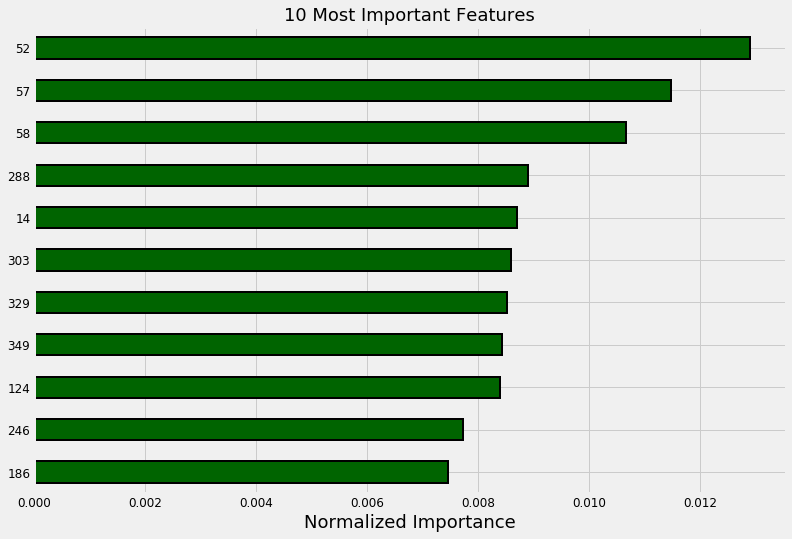

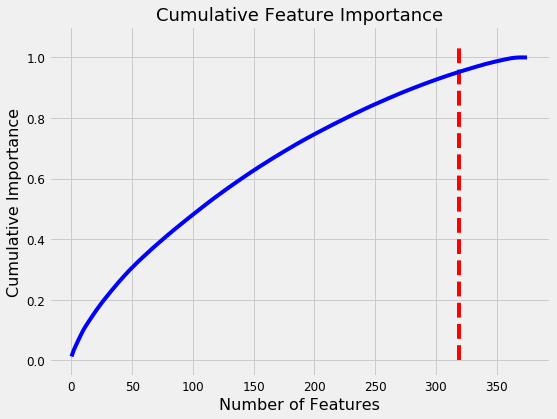

319 features required for 95% of cumulative importance.


In [279]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

### 변수 중요도 하위 열 제거 
- 하위 200개 열 제거: 0.6391304347826087
- 하위 150개 열 제거: 0.6672101449275363
- 하위 120개 열 제거: 0.6853260869565216
- 하위 110개 열 제거: 0.6972826086956522
- 하위 100개 열 제거: 0.7489130434782609
- 하위 50개 열 제거: 0.7175724637681159

In [504]:
X_rf = data.loc[:,'0':'589']
y = data.loc[:,'Pass/Fail']
X_rf = minmaxscaler.fit_transform(X_rf)

In [505]:
low_importance = []
low_importance = feature_importances.sort_values('importance', ascending = True).head(50)['feature']

In [506]:
low_feature_num = pd.DataFrame(low_importance)['feature']

In [507]:
X_rf = pd.DataFrame(X_rf).drop(low_feature_num, axis=1)

In [508]:
X_rf.columns

Int64Index([  0,   2,   3,   4,   6,   7,   9,  10,  11,  12,
            ...
            365, 366, 367, 368, 369, 370, 371, 372, 373, 375],
           dtype='int64', length=326)

In [509]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
# random_state = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,0,1,3,5,7,9,10,11,13]
'''random_state =[]
for i in range(0,31):
  random_state.append(i)
#print(random_state, end = ' ')'''
random_state = []
for j in range(1,101): 
    random_state.append(j)
    
for rand in random_state:
  X_train,X_test,y_train,y_test=train_test_split(X_rf,y,test_size=0.2,random_state= rand )
  log_reg = LogisticRegression(random_state=13,solver='liblinear',C=10.0)
  log_reg.fit(X_train, y_train)
  pred_proba_1 = log_reg.predict_proba(X_test)[:,1]
  auc_test = roc_auc_score(y_test, pred_proba_1)
print('mean auc_test=',np.mean(auc_test))

mean auc_test= 0.6177811550151975


## 상관관계 분석
- 상위 100개 열 선택: 0.7190217391304349
- 상위 200개 열 선택: 0.7425724637681159
- 상위 210개 열 선택: 0.7382246376811594

=> 제일 높게 나온 값: 상위 200개 열 선택: 0.7425724637681159

In [361]:
X = data.loc[:,'0':'589']
y = data.loc[:,'Pass/Fail']

In [363]:
minmaxscaler.fit(X)
X = minmaxscaler.transform(X)

In [386]:
feature_name = list(pd.DataFrame(X).columns)
# no of maximum features we need to select
num_feats=200

In [387]:
X = pd.DataFrame(X)

In [388]:
X.columns

RangeIndex(start=0, stop=376, step=1)

In [389]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

200 selected features


In [390]:
df_cor = pd.DataFrame(X, columns=cor_feature)

In [391]:
X_cor = df_cor.copy() 

In [502]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
# random_state = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,0,1,3,5,7,9,10,11,13]
'''random_state =[]
for i in range(0,31):
  random_state.append(i)
#print(random_state, end = ' ')'''

random_state = []
for j in range(1,101): 
    random_state.append(j)

for rand in random_state:
  X_train,X_test,y_train,y_test=train_test_split(X_cor,y,test_size=0.2,random_state= rand )
  log_reg = LogisticRegression(random_state=13,solver='liblinear',C=10.0)
  log_reg.fit(X_train, y_train)
  pred_proba_1 = log_reg.predict_proba(X_test)[:,1]
  auc_test = roc_auc_score(y_test, pred_proba_1)
print('mean auc_test=',np.mean(auc_test))

mean auc_test= 0.5851063829787234


## chi-square features
- target 과 numerical variable 사이의 chi-square metirc 
- chi-squared values가 최대값을 갖는 variable select
- 상위 50개 열 선택: 0.6621376811594203
- 상위 100개 열 선택: 0.6937499999999999
- 상위 200개 열 선택: 0.6721014492753623

=> 제일 높게 나온 값: 상위 100개 열 선택: 0.6937499999999999

In [410]:
import warnings
warnings.filterwarnings('ignore')

In [393]:
X = data.loc[:,'0':'589']
y = data.loc[:,'Pass/Fail']

In [405]:
feature_name = list(pd.DataFrame(X).columns)
# no of maximum features we need to select
num_feats=50

In [406]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X) # 표준화 진행 
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

50 selected features


In [407]:
df_chi = pd.DataFrame(X, columns=chi_feature)
X_chi = df_chi.copy() 

In [ ]:
random_state = range()

In [501]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

# random_state = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,0,1,3,5,7,9,10,11,13]
'''random_state =[]
for i in range(0,31):
  random_state.append(i)
#print(random_state, end = ' ')'''

random_state = []
for j in range(1,101): 
    random_state.append(j)

for rand in random_state:
  X_train,X_test,y_train,y_test=train_test_split(X_chi,y,test_size=0.2,random_state= rand )
  log_reg = LogisticRegression(random_state=13,solver='liblinear',C=10.0)
  log_reg.fit(X_train, y_train)
  pred_proba_1 = log_reg.predict_proba(X_test)[:,1]
  auc_test = roc_auc_score(y_test, pred_proba_1)
print('mean auc_test=',np.mean(auc_test))

mean auc_test= 0.5995440729483282


## Recursive Feature Elimination
- wrapper based method 
- 시작: 모든 열 --> 점점 열의 갯수를 줄여나감 
- 이 때 열을 선택하는 기준: coef_ attribute(LogisticRegression) 혹은 feature importances attribute(Random Forest)


- 상위 40개 열 선택: 0.7878623188405798
- 상위 50개 열 선택: 0.793840579710145
- 상위 80개 열 선택: 0.7762681159420289
- 상위 100개 열 선택: 0.7494565217391305


=> 제일 높게 나온 값: 상위 50개 열 선택: 0.793840579710145

In [432]:
feature_name = list(pd.DataFrame(X).columns)
# no of maximum features we need to select
num_feats=50

In [433]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y) # 표준화 진행 

Fitting estimator with 376 features.
Fitting estimator with 366 features.
Fitting estimator with 356 features.
Fitting estimator with 346 features.
Fitting estimator with 336 features.
Fitting estimator with 326 features.
Fitting estimator with 316 features.
Fitting estimator with 306 features.
Fitting estimator with 296 features.
Fitting estimator with 286 features.
Fitting estimator with 276 features.
Fitting estimator with 266 features.
Fitting estimator with 256 features.
Fitting estimator with 246 features.
Fitting estimator with 236 features.
Fitting estimator with 226 features.
Fitting estimator with 216 features.
Fitting estimator with 206 features.
Fitting estimator with 196 features.
Fitting estimator with 186 features.
Fitting estimator with 176 features.
Fitting estimator with 166 features.
Fitting estimator with 156 features.
Fitting estimator with 146 features.
Fitting estimator with 136 features.
Fitting estimator with 126 features.
Fitting estimator with 116 features.
F

RFE(estimator=LogisticRegression(), n_features_to_select=50, step=10, verbose=5)

In [434]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

50 selected features


In [435]:
df_rfe = pd.DataFrame(X, columns=rfe_feature)
X_rfe = df_rfe.copy() 

In [495]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
random_state = []
for j in range(1,101): 
    random_state.append(j)
# random_state = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,0,1,3,5,7,9,10,11,13]
'''random_state =[]
for i in range(0,31):
  random_state.append(i)
#print(random_state, end = ' ')'''

for rand in random_state:
  X_train,X_test,y_train,y_test=train_test_split(X_rfe,y,test_size=0.2,random_state= rand )
  log_reg = LogisticRegression(random_state=13,solver='liblinear',C=10.0)
  log_reg.fit(X_train, y_train)
  pred_proba_1 = log_reg.predict_proba(X_test)[:,1]
  auc_test = roc_auc_score(y_test, pred_proba_1)
print('mean auc_test=',np.mean(auc_test))

mean auc_test= 0.6702127659574468


## Lasso: SelectFromModel
- L1-norm 을 통해 제약을 주는 방법 
- 대부분의 feature에 weight 값을 0을 준다. (강한 제약)


- 143개의 feature 선택: 0.7077898550724638
- 100개의 feature 선택: 0.7127717391304348
- 50개의 feature 선택: 0.7598731884057971
- 40개의 feature 선택: 0.7711956521739131
- 30개의 feature 선택 0.7489130434782608

=> 제일 높게 나온 값: 40개의 feature 선택: 0.7711956521739131

In [460]:
feature_name = list(pd.DataFrame(X).columns)
# no of maximum features we need to select
num_feats=30

In [461]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="none"), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y) # 표준화 진행 

SelectFromModel(estimator=LogisticRegression(penalty='none'), max_features=30)

In [462]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

30 selected features


In [463]:
df_lr = pd.DataFrame(X, columns=embeded_lr_feature)
X_lr = df_lr.copy() 

In [496]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
#random_state = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,0,1,3,5,7,9,10,11,13]
'''random_state =[]
for i in range(0,31):
  random_state.append(i)
#print(random_state, end = ' ')'''
random_state = []
for j in range(1,101): 
    random_state.append(j)

for rand in random_state:
  X_train,X_test,y_train,y_test=train_test_split(X_lr,y,test_size=0.2,random_state= rand )
  log_reg = LogisticRegression(random_state=13,solver='liblinear',C=10.0)
  log_reg.fit(X_train, y_train)
  pred_proba_1 = log_reg.predict_proba(X_test)[:,1]
  auc_test = roc_auc_score(y_test, pred_proba_1)
print('mean auc_test=',np.mean(auc_test))

mean auc_test= 0.6451367781155015


## LGBMClassifier : SelectFromModel

 - LGBMClassifier로 featureimportances 구하기
 - NULL값이 20개 이상인 열 삭제 + 하나의 값만 가지는 열 삭제 
 - NULL값이 20개 이상인 열 삭제에도 null값이 있는 행 삭제¶
 - 결과적으로 X: 1477 rows × 376 columns
 
 
 - 상위 20개의 feature 선택: 0.6617753623188406
 - 상위 30개의 feature 선택: 0.6817028985507246
 - 상위 50개의 feature 선택: 0.6525362318840581
 - 상위 58개의 feature 선택: 0.6393115942028985
 
 
 => 제일 높게 나온 값: 상위 30개의 feature 선택: 0.6817028985507246

In [471]:
X.head()

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5287,0.0167,0.0055,...,1.6679,13.7755,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077


In [490]:
feature_name = list(pd.DataFrame(X).columns)
# no of maximum features we need to select
num_feats= 20

In [491]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

SelectFromModel(estimator=LGBMClassifier(colsample_bytree=0.2,
                                         learning_rate=0.05,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         num_leaves=32, reg_alpha=3,
                                         reg_lambda=1),
                max_features=20)

In [492]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

20 selected features


In [493]:
df_lgb = pd.DataFrame(X, columns=embeded_lgb_feature)
X_lgb = df_lgb.copy() 

In [499]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
# random_state = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,0,1,3,5,7,9,10,11,13]

random_state = []
for j in range(1,101): 
    random_state.append(j)

for rand in random_state:
  X_train,X_test,y_train,y_test=train_test_split(X_lgb,y,test_size=0.2,random_state= rand )
  log_reg = LogisticRegression(random_state=13,solver='liblinear',C=10.0)
  log_reg.fit(X_train, y_train)
  pred_proba_1 = log_reg.predict_proba(X_test)[:,1]
  auc_test = roc_auc_score(y_test, pred_proba_1)
print('mean auc_test=',np.mean(auc_test))

mean auc_test= 0.6808510638297872
